In [7]:
from PIL import Image
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets, svm, linear_model
matplotlib.style.use('bmh')
matplotlib.rcParams['figure.figsize']=(10,7)

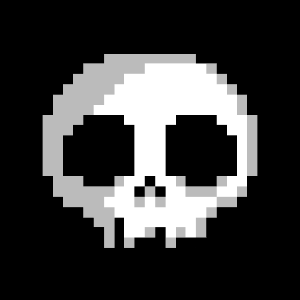

In [8]:
img=Image.open("1.png")
img=img.convert("RGB")
pixels = np.array(img)

Image.fromarray(pixels).resize((300,300), Image.NEAREST)

In [9]:
pixels.shape

(364, 364, 3)

In [10]:
palette =  list(set(tuple(x) for x in pixels.reshape(-1, 3)))
palette

[(227, 227, 227),
 (198, 198, 198),
 (13, 13, 13),
 (89, 89, 89),
 (50, 50, 50),
 (143, 143, 143),
 (122, 122, 122),
 (202, 202, 202),
 (212, 212, 212),
 (65, 65, 65),
 (219, 219, 219),
 (5, 5, 5),
 (0, 0, 0),
 (72, 72, 72),
 (124, 124, 124),
 (93, 93, 93),
 (43, 43, 43),
 (131, 131, 131),
 (162, 162, 162),
 (190, 190, 190),
 (161, 161, 161),
 (221, 221, 221),
 (168, 168, 168),
 (228, 228, 228),
 (104, 104, 104),
 (111, 111, 111),
 (178, 178, 178),
 (230, 230, 230),
 (201, 201, 201),
 (209, 209, 209),
 (149, 149, 149),
 (2, 2, 2),
 (237, 237, 237),
 (208, 208, 208),
 (54, 54, 54),
 (229, 229, 229),
 (30, 30, 30),
 (61, 61, 61),
 (99, 99, 99),
 (127, 127, 127),
 (158, 158, 158),
 (179, 179, 179),
 (243, 243, 243),
 (70, 70, 70),
 (255, 255, 255),
 (108, 108, 108),
 (253, 253, 253),
 (103, 103, 103),
 (3, 3, 3),
 (105, 105, 105),
 (238, 238, 238),
 (84, 84, 84),
 (60, 60, 60),
 (119, 119, 119),
 (252, 252, 252),
 (180, 180, 180),
 (33, 33, 33),
 (126, 126, 126),
 (157, 157, 157),
 (97, 9

In [11]:
reverse_palette = {c:i for i, c in enumerate(palette)}
h, w = pixels.shape[:2]
X = np.mgrid[0:h, 0:w].reshape(2, -1).T
y = np.array([reverse_palette[tuple(x)] for x in pixels.reshape(-1,3)])
X = X.astype('float64')
X = np.concatenate([X, X+[.1,.1], X+[.1,-.1], X+[-.1,.1], X+[-.1,-.1]])
y = np.concatenate([y,y,y,y,y])

from matplotlib.colors import LinearSegmentedColormap
cm= LinearSegmentedColormap.from_list("cmm", np.array(palette)/255 )
matplotlib.rcParams['figure.figsize']=(10,10*h/w)
print(X.shape, y.shape)

(662480, 2) (662480,)


In [12]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(256,64), learning_rate_init=1e-3, max_iter=50, solver="adam")
X_mean = X.mean(axis=0,keepdims=True)
X_std = X.std()/10
clf.fit((X-X_mean)/X_std, y)

# 邊界
x_min, y_min = X.min(axis=0)-1
x_max, y_max = X.max(axis=0)+1

# 座標點
grid  = np.mgrid[x_min:x_max:800j, y_min:y_max:800j]
# grid.shape = (2, 200, 200)

# 在座標點 算出 svm 的判斷函數
Z = clf.predict( (grid.reshape(2, -1).T-X_mean)/X_std)

C:\Users\jywun\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


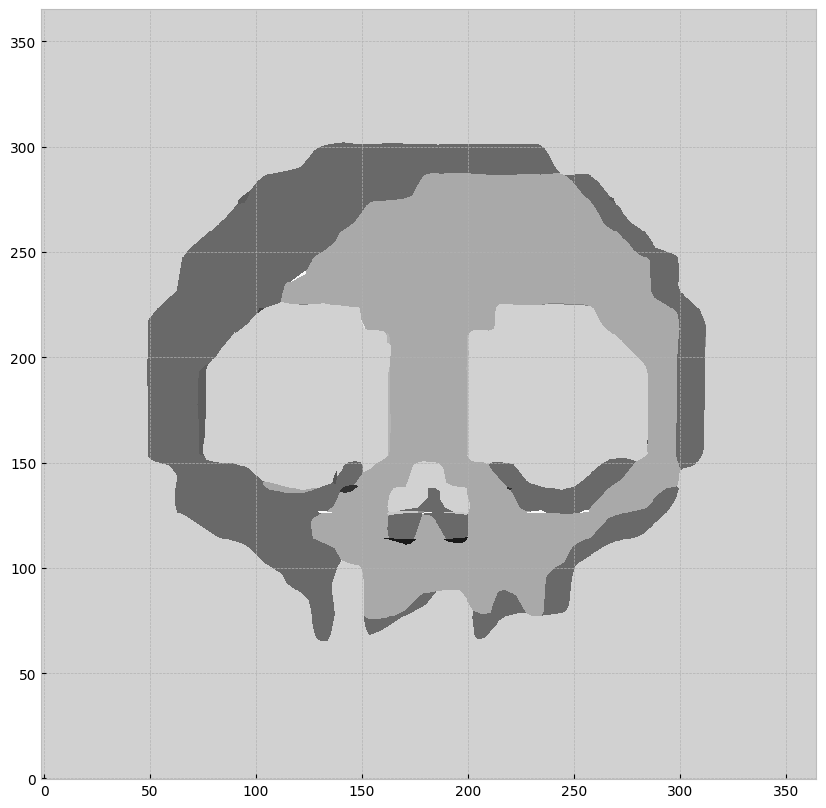

In [13]:
Z  = Z.reshape(grid.shape[1:])
plt.pcolormesh(grid[1], h-grid[0], Z, cmap=cm, alpha=1);